Repeat the previous process (point 6), but now using the built-in algorithms in the Scikit-Learn library. How different
are these results from those of your implementation? Why?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE


In [2]:
# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Filter the dataset to only include 0s and 8s
X = X[(y == 0) | (y == 8)]
y = y[(y == 0) | (y == 8)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [3]:
# Train a naive logistic regression model on the raw MNIST images
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = logistic_model.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model on raw images: {accuracy_raw:.2f}")


Accuracy of the model on raw images: 0.99


/home/pyxsis-usuario/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Perform SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train)

# Fit t-SNE on the combined training and test data
tsne = TSNE(n_components=2, random_state=42)
X_tsne_combined = tsne.fit_transform(np.vstack((X_train, X_test)))

# Separate the transformed data back into training and test sets
X_tsne_train = X_tsne_combined[:len(X_train)]
X_tsne_test = X_tsne_combined[len(X_train):]


/home/pyxsis-usuario/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/pyxsis-usuario/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE')

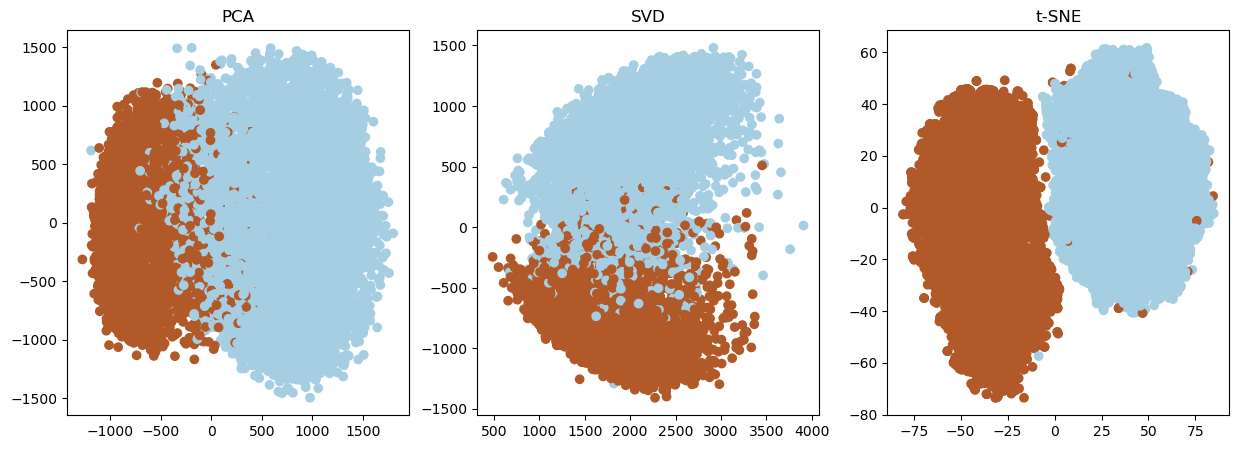

In [5]:
# Plot the 2 new features generated by each algorithm
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("PCA")

plt.subplot(132)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("SVD")

plt.subplot(133)
plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1],
            c=y_train, cmap=plt.cm.Paired)
plt.title("t-SNE")

# plt.show()


In [6]:
# Train logistic regression models on reduced feature sets
logistic_model_pca = LogisticRegression(random_state=42)
logistic_model_pca.fit(X_pca, y_train)

logistic_model_svd = LogisticRegression(random_state=42)
logistic_model_svd.fit(X_svd, y_train)

logistic_model_tsne = LogisticRegression(random_state=42)
logistic_model_tsne.fit(X_tsne_train, y_train)

# Evaluate the models on the test set
y_pred_pca = logistic_model_pca.predict(pca.transform(X_test))
y_pred_svd = logistic_model_svd.predict(svd.transform(X_test))
y_pred_tsne = logistic_model_tsne.predict(X_tsne_test)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_svd = accuracy_score(y_test, y_pred_svd)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

print(f"Accuracy with PCA: {accuracy_pca:.2f}")
print(f"Accuracy with SVD: {accuracy_svd:.2f}")
print(f"Accuracy with t-SNE: {accuracy_tsne:.2f}")

Accuracy with PCA: 0.95
Accuracy with SVD: 0.96
Accuracy with t-SNE: 1.00
